In [1]:
import tensorflow        as tf
import numpy             as np
import pandas            as pd
import urllib.request    as req
import random            as rnd
import matplotlib.pyplot as plt
import os                as os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.losses import CategoricalCrossentropy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# This is just a confuguration file for the data seeding
# and the matplotlib conf
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

ds_train = image_dataset_from_directory(
    '../input/car-or-truck/train',
    labels='inferred',
    label_mode='categorical',
    class_names='inferred',  # Automatically infer class names from subdirectories
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

In [3]:
# Load training and validation sets
TRAIN_DIRECTORY = "../input/brain-tumor-mri-dataset/Training/"
TEST_DIRECTORY  = "../input/brain-tumor-mri-dataset/Testing/"
train_generator = image_dataset_from_directory(
    TRAIN_DIRECTORY,
    labels='inferred',
    label_mode='categorical',
    class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
    image_size=[150, 150],
    interpolation='nearest',
    batch_size=100,
    shuffle=True,
)
test_generator = image_dataset_from_directory(
    TEST_DIRECTORY,
    labels='inferred',
    label_mode='categorical',
    class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
    image_size=[150,150],
    interpolation='nearest',
    batch_size=100,
    shuffle=False,
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [4]:
## download the inceptionV3 model
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
req.urlretrieve(weights_url,weights_file)

('inception_v3.h5', <http.client.HTTPMessage at 0x7dd46dce6e90>)

In [5]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

In [6]:
## adding the weight to the model
# load pre-trained weights
pre_trained_model.load_weights(weights_file)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

In [7]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [8]:
model = tf.keras.Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dense(1024,activation="relu"),
    layers.Dense(4,activation="softmax")
])

In [9]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss = CategoricalCrossentropy(),
    metrics=["accuracy"],
)


In [11]:
history = model.fit(
            train_generator,
            validation_data=test_generator,
            epochs=70,
            verbose=1)

Epoch 1/70
58/58 [==============================] - 7s 105ms/step - loss: 0.8727 - accuracy: 0.8353 - val_loss: 1.0245 - val_accuracy: 0.7712
Epoch 2/70
58/58 [==============================] - 8s 117ms/step - loss: 0.6062 - accuracy: 0.8563 - val_loss: 1.3622 - val_accuracy: 0.7941
Epoch 3/70
58/58 [==============================] - 7s 114ms/step - loss: 0.5925 - accuracy: 0.8619 - val_loss: 0.8488 - val_accuracy: 0.8070
Epoch 4/70
58/58 [==============================] - 7s 108ms/step - loss: 0.4151 - accuracy: 0.8937 - val_loss: 0.7203 - val_accuracy: 0.8200
Epoch 5/70
58/58 [==============================] - 6s 101ms/step - loss: 0.3127 - accuracy: 0.9076 - val_loss: 0.4227 - val_accuracy: 0.8734
Epoch 6/70
58/58 [==============================] - 7s 106ms/step - loss: 0.4358 - accuracy: 0.8782 - val_loss: 0.4864 - val_accuracy: 0.8734
Epoch 7/70
58/58 [==============================] - 7s 108ms/step - loss: 0.2540 - accuracy: 0.9270 - val_loss: 0.3707 - val_accuracy: 0.8924
Epoch 

<Figure size 640x480 with 0 Axes>

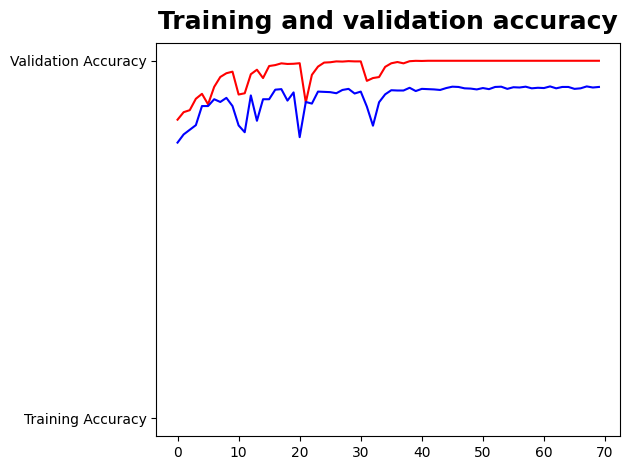

<Figure size 640x480 with 0 Axes>

In [15]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 640x480 with 0 Axes>

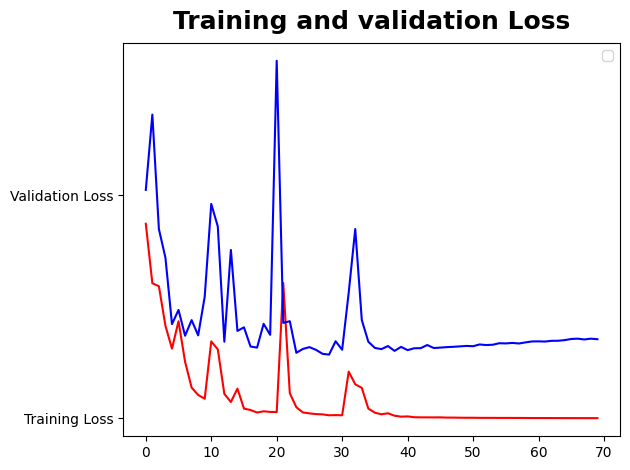

<Figure size 640x480 with 0 Axes>

In [17]:
epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

